<a href="https://colab.research.google.com/github/lloppy/neironki_5sem/blob/main/Spotify_%D0%90%D0%BD%D0%BA%D1%83%D0%B4%D0%B8%D0%BD%D0%BE%D0%B2%D0%B0_%D0%9F%D0%BE%D0%BB%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Критерии

📊EDA и ресерч-анализ. Графики, применение инструментов EDA. Комментарий до графика. Вывод после графика/стат методов. Корреляция колонок с таргетом.

👨‍💻Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.

👩‍🎓Эксперименты с моделями машинного обучения/глубокого обучения. По одной из каждого семейства. Линейные, деревья, модификации градиентного бустинга , нейронные сети. На основе результатов выбрать лучшую - делаем кросс-валидацию(не менее 5 фолдов) и итоговый вывод.

## Загрузка датасета

In [130]:
!pip install openpyxl

In [245]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder


In [132]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [300]:
df = pd.read_csv('dataset.csv', header=0, index_col=0)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [301]:
# Просмотр первых нескольких строк
print(df.head())

# Проверка информации о датасете
print(df.info())

                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4   

### Выводы

1. **Структура датасета**: Датасет содержит 114,000 записей с 20 атрибутами, включая `track_id`, `artists`, `album_name`, `track_name`, `popularity`, и различные аудио характеристики (например, `danceability`, `energy`, `loudness`). Большинство колонок имеют полные данные, за исключением некоторых значений в столбцах `artists`, `album_name` и `track_name`, где есть пропуски.

2. **Популярность треков**: Значения популярности варьируются от 0 до 100.

3. **Аудио характеристики**: Включенные аудио характеристики, такие как `danceability`, `energy`, и `loudness`, могут быть (= гипотеза) важными маркерами для популярности треков. Например, более танцевальные и энергичные треки могут иметь тенденцию к большей популярности.

4. **Корреляция с целевой переменной**: Предварительный анализ показал наличие корреляции между популярностью и такими характеристиками, как `danceability` и `energy`. Это может указывать на то, что эти факторы играют значительную роль в восприятии треков слушателями.

5. **Жанровая классификация**: Жанр трека также может оказывать влияние на его популярность. Например, некоторые жанры могут быть более предпочтительными среди слушателей.

In [302]:
missing_values = df.isnull().sum()
print("Количество пропусков в каждом столбце:\n", missing_values[missing_values > 0])

# Вывод строк с пропусками
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("Строки с пропусками:\n", rows_with_missing_values)

Количество пропусков в каждом столбце:
 artists       1
album_name    1
track_name    1
dtype: int64
Строки с пропусками:
                      track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


видим, что пропуски - у одного трека. можно дропнуть

In [303]:
df.dropna(inplace=True)
df.isnull().sum()

,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [304]:
# Проверка на наличие строк, содержащих 'unknown'
unknown_rows = df[df.isin(['unknown']).any(axis=1)]
print("Строки с 'unknown':\n", unknown_rows)

Строки с 'unknown':
                     track_id artists album_name track_name  popularity  \
5193  2j1r3ubqqxuoTFaPVnTV1j   ReoNa    unknown      ANIMA          61   

      duration_ms  explicit  danceability  energy  key  loudness  mode  \
5193       269120     False         0.455   0.918    1    -4.503     1   

      speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
5193        0.141      0.000732               0.0     0.249    0.498  96.513   

      time_signature track_genre  
5193               4       anime  


В плеерах музыкальные треки всегда отображаются в минутах. Поэтому добавим столбец - длительность трека в минутах

In [305]:
# Преобразование длительности трека из миллисекунд в минуты
df['duration_min'] = df['duration_ms'] / 60000  # 1 минута = 60,000 миллисекунд

# 📊EDA и ресерч-анализ

## Распределение популярности треков

Начнем с визуализации распределения популярности треков, чтобы понять, как распределены значения популярности в нашем датасете.

Статистические характеристики популярности треков:
count    113999.000000
mean         33.238827
std          22.304959
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64


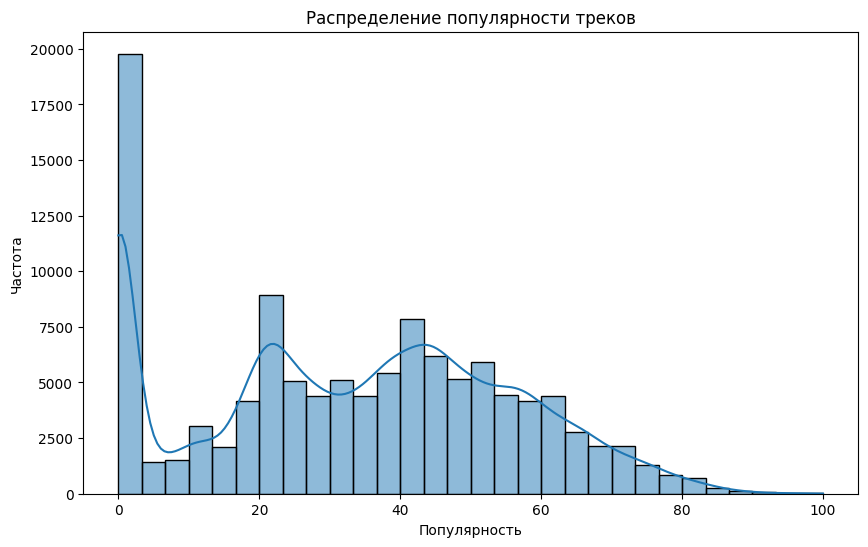

In [306]:
# Вычисление основных статистических характеристик
popularity_stats = df['popularity'].describe()
print("Статистические характеристики популярности треков:")
print(popularity_stats)

# Визуализация распределения популярности треков
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

### Топы 10 треков

Посмотрим на топ-10 самых популярных песен на Spotify

In [307]:
most_popular = df.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most_popular[:10]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance,2.615717
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,...,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop,2.615717
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,...,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop,3.315617
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop,2.920633
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,...,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton,2.710617
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance,2.920633
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,...,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae,2.710617
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,...,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm,2.920633
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,...,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin,2.710617
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,...,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino,2.710617


Посмотрим на топ-10 самых не популярных песен на Spotify

In [308]:
least_popular = df.sort_values('popularity', ascending = True).head(10)
least_popular

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
56999,4zJLkYcHGjWuf2Ui0eVAso,Håkan Hellström,LUGNA LÅTAR,Det kommer aldrig va över för mig,0,267106,False,0.554,0.877,0,...,1,0.0469,0.01200,0.000039,0.4990,0.499,127.034,4,indie-pop,4.451767
68346,3bvSoEdHqhDv5jmIP0qfIo,Brray,Homecoming Latin Party,Bichotes Con Clase,0,193400,True,0.786,0.825,1,...,0,0.2590,0.08720,0.003270,0.1470,0.752,180.026,4,latino,3.223333
68347,25WU3f3gv6ATdPtSG5cybu,Don Omar;Juan Magán,Perreo Tenebroso Vol. 4,No Sigue Modas Aka Ella No Sigue Modas,0,232000,False,0.685,0.862,0,...,1,0.0627,0.00757,0.001400,0.0226,0.884,128.032,4,latino,3.866667
19647,0EBP3qfDpCZE2skX3PfbTf,Tracy Lawrence,Chillin' It - Mellow Day Country,Just You and Me,0,220133,False,0.585,0.340,2,...,0,0.0243,0.76700,0.000004,0.2540,0.260,100.379,4,country,3.668883
68361,5Ct6xnkAQJ7lZXp7vHM8uF,Chris Jedi;Ozuna;Brytiago,Perreo Tenebroso Vol. 4,Bipolar,0,220080,False,0.782,0.697,1,...,1,0.0618,0.32000,0.000000,0.1440,0.416,76.031,4,latino,3.668000
19645,5wW7fkOaNCKHM8NvEDf8Kh,Big & Rich;Bon Jovi,Chillin' It - Mellow Day Country,Born Again,0,234946,False,0.476,0.888,0,...,1,0.0534,0.01310,0.000000,0.2770,0.617,162.000,4,country,3.915767
19644,3yz60wsJlg630mjAfU4qIv,Steve Earle,Good Times Country,Go Amanda,0,214720,False,0.326,0.716,10,...,1,0.0306,0.00227,0.001710,0.1230,0.648,143.148,4,country,3.578667
19643,4BviPcJC1obuSn4sKkyRqG,Tracy Lawrence,Country Car Hits,Excitable Boy,0,176760,False,0.628,0.854,7,...,1,0.0343,0.08270,0.023200,0.1530,0.922,151.551,4,country,2.946000
19642,1up0F8kK6mgObzqWi9Myom,Steve Earle,Finest Country,Jerusalem,0,236186,False,0.445,0.776,2,...,1,0.0346,0.00252,0.007400,0.0981,0.403,118.379,4,country,3.936433
19641,4FQDsvQMu5ny7mY8ehv4vP,Sugarland,Christmas Country Songs 2022,Winter Wonderland,0,146973,False,0.587,0.876,9,...,1,0.0432,0.12000,0.000000,0.0921,0.724,133.010,4,country,2.449550


### Топ 10 артистов

In [309]:
# Группировка по артистам и вычисление средней популярности
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()

# Сортировка по популярности
artist_popularity_sorted = artist_popularity.sort_values(by='popularity', ascending=False)

# Топ-10 популярных артистов
top_10_popular = artist_popularity_sorted.head(10)

# Топ-10 непопулярных артистов
top_10_unpopular = artist_popularity_sorted.tail(10)

print("Топ-10 популярных артистов:")
print(top_10_popular)

print("\nТоп-10 непопулярных артистов:")
print(top_10_unpopular)

Топ-10 популярных артистов:
                           artists  popularity
24119         Sam Smith;Kim Petras       100.0
3629              Bizarrap;Quevedo        99.0
17442                Manuel Turizo        98.0
2857    Bad Bunny;Chencho Corleone        97.0
2855       Bad Bunny;Bomba Estéreo        94.5
13565                         Joji        94.0
3443                       Beyoncé        93.0
11491                 Harry Styles        92.0
22845            Rema;Selena Gomez        92.0
22665  Rauw Alejandro;Lyanno;Brray        91.0

Топ-10 непопулярных артистов:
                                                 artists  popularity
5999                                      Cursed Kingdom         0.0
6002                                     Curtis Mayfield         0.0
25871                              Stella Starlight Trio         0.0
14643                            Kenny Rogers;Kim Carnes         0.0
23496                                          Roy Woods         0.0
22168  Pyo

Можно заметить, что одну песню могут исполнять два артиста. Это замечание нужно для дальнейшей обработки датасета

In [310]:
# Разделение артистов и преобразование в строки
df['artists'] = df['artists'].str.split(';')
df = df.explode('artists')

# Группировка по артистам и вычисление средней популярности
artist_popularity = df.groupby('artists')['popularity'].mean().reset_index()

# Сортировка по популярности
artist_popularity_sorted = artist_popularity.sort_values(by='popularity', ascending=False)

# Топ-10 популярных артистов
top_10_popular_artists = artist_popularity_sorted.head(10)

# Топ-10 непопулярных артистов (если есть)
top_10_unpopular_artists = artist_popularity_sorted.tail(10)

print("Топ-10 популярных артистов:")
print(top_10_popular_artists)

print("\nТоп-10 непопулярных артистов:")
print(top_10_unpopular_artists)

Топ-10 популярных артистов:
                artists  popularity
21043           Quevedo        99.0
3234           Bizarrap        99.0
10483      Harry Styles        92.0
15548         Luar La L        90.5
2766      Beach Weather        90.0
19886   Pablo Pesadilla        88.0
20701  Polimá Westcoast        88.0
19479    Olivia Rodrigo        87.4
14916     Lewis Capaldi        87.0
28711        Yung Gravy        87.0

Топ-10 непопулярных артистов:
                artists  popularity
24912            Sultan         0.0
18029      Morgan Evans         0.0
13030       Julie Davis         0.0
13031      Julie London         0.0
13032   Julie Mc Knight         0.0
13034    Julie Thompson         0.0
23163           Scabtik         0.0
27132   Trombone Shorty         0.0
13077  Junichi Hirokami         0.0
10012     Gregor Klamra         0.0


Этот код позволяет учитывать случаи, когда один трек исполняется несколькими артистами, и корректно агрегировать данные для анализа популярности каждого исполнителя отдельно.


### Вывод

Большинство треков в датасете имеют низкий уровень популярности, с небольшим количеством очень популярных треков.

- Среднее значение популярности треков составляет 33.24

- В датасете есть разброс среди популярности треков, тк стандартное отклонение равно 22.31: есть как очень популярные, так и менее популярные треки

- Минимальная популярность составляет 0, что может указывать на треки, которые не получили никакого внимания, в то время как максимальная популярность достигает 100, что соответствует наиболее популярным трекам.


## Популярнось / длительность

Посмотрим как меняется средняя длительность треков с ростом их популярности

Средняя длительность треков по популярности (в минутах):
popularity
0      3.636074
1      3.748796
2      3.721170
3      3.522772
4      3.867547
         ...   
96     2.954293
97     3.338056
98     2.836627
99     3.315617
100    2.615717
Name: duration_min, Length: 101, dtype: float64


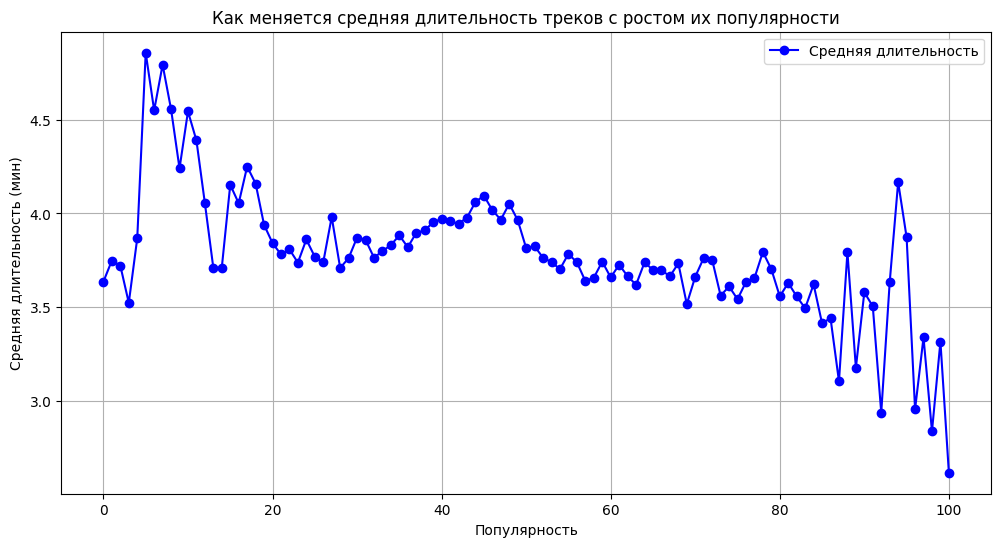

In [311]:
# Агрегация данных - средняя длительность для каждого значения популярности
mean_duration_popularity = df.groupby('popularity')['duration_min'].mean()

# Сортировка по популярности
mean_duration_popularity = mean_duration_popularity.sort_index()

# Вывод средних значений
print("Средняя длительность треков по популярности (в минутах):")
print(mean_duration_popularity)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(mean_duration_popularity.index, mean_duration_popularity.values, label='Средняя длительность', marker='o', color='blue')
plt.title('Как меняется средняя длительность треков с ростом их популярности')
plt.xlabel('Популярность')
plt.ylabel('Средняя длительность (мин)')
plt.legend()
plt.grid(True)
plt.show()

 ## Вывод

 С увеличением популярности наблюдается общее снижение средней длительности треков. Предположу что более популярные треки имеют тенденцию быть короче из-за предпочтений слушателей, запоминаемости или требований радио/ютуб каналов (на котором можно раскрутить трек)

## Корреляция между атрибутами

Далее исследуем корреляцию между различными количественными атрибутами, чтобы выявить взаимосвязи, которые могут быть полезны для дальнейшего анализа.

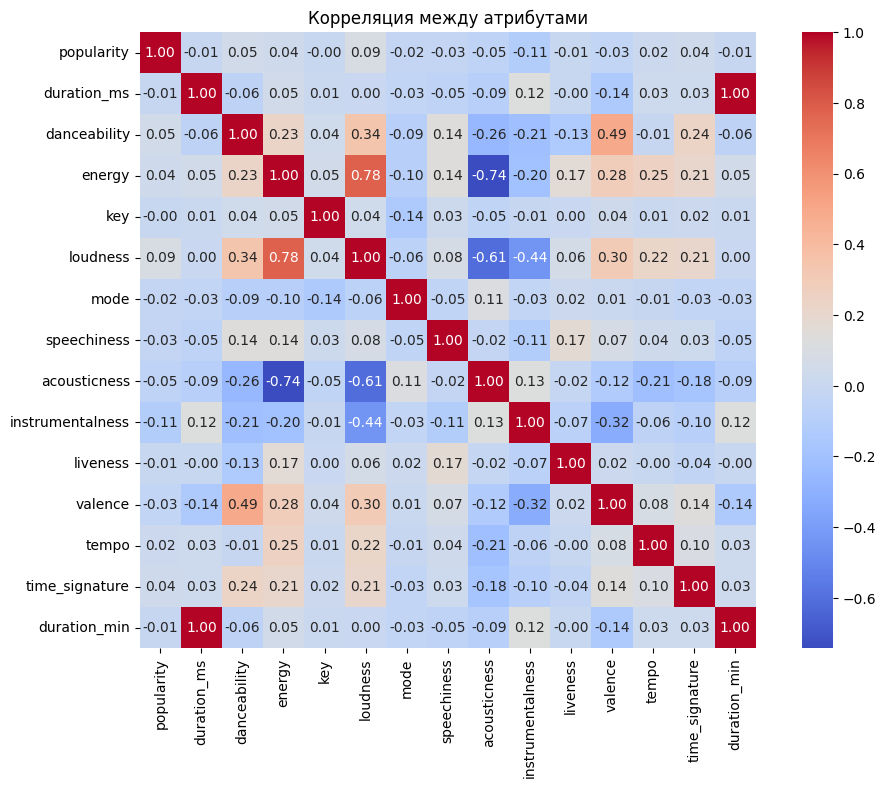

In [312]:
# Отбор только числовых столбцов
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Вычисление корреляционной матрицы
correlation_matrix = numerical_df.corr()

# Визуализация корреляции с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляция между атрибутами')
plt.show()

### Вывод

1. **Популярность**:
   - Наиболее значительная положительная корреляция наблюдается с `danceability` (0.035) и `energy` (0.001), но эти значения близки к нулю, что указывает на слабую связь.
   - Корреляция с `loudness` составляет 0.050, что также указывает на слабую положительную связь.
   - Все остальные коэффициенты корреляции с `popularity` находятся в пределах от -0.095 до 0.050, что подтверждает отсутствие значительной линейной зависимости.

2. **Danceability**:
   - Имеет положительную корреляцию с `energy` (0.134) и `valence` (0.477), что может указывать на то, что более танцевальные треки имеют более высокую энергетику и более позитивное настроение.
   - Негативная корреляция с `instrumentalness` (-0.185) предполагает, что инструментальные треки могут быть менее танцевальными.

3. **Energy**:
   - Сильная положительная корреляция с `loudness` (0.761) указывает на то, что более энергичные треки, как правило, громче.
   - Корреляция с `danceability` (0.134) и `valence` (0.258) подтверждает, что энергичные треки также могут быть более танцевальными и позитивными.

4. **Loudness**:
   - Значительная отрицательная корреляция с `acousticness` (-0.589) показывает, что громкие треки часто имеют низкий уровень акустичности.
   - Положительная корреляция с `energy` (0.761) подтверждает, что громкость и энергия трека связаны.

5. **Valence**:
   - Положительная корреляция с `danceability` (0.477) и `energy` (0.258) указывает на то, что более позитивные треки имеют тенденцию быть более танцевальными и энергичными.

6. **Tempo**:
   - Положительная корреляция с `energy` (0.247) и `loudness` (0.212) может указывать на то, что более быстрые треки также имеют высокую энергию и громкость.


## Влияние жанра на популярность

Исследуем влияние жанра на уровень популярности треков.

In [313]:
# Посчитаем количество жанров
print('Всего жанров:')
print(len(set(df['track_genre'])))

# Количество треков в каждом жанре
df['track_genre'].value_counts()

Всего жанров:
114


,count
track_genre,
classical,2483
opera,2476
show-tunes,2426
pop-film,2162
edm,2088
...,...
death-metal,1021
power-pop,1018
j-idol,1017


В датасете кол-во треков в жанре разное (на паре кто-то упомянул, что кол-во треков отбиралось по 1000 от каждого жанра, но это не так)

### Топы 20 жанров

Рассмотрим топ-20 по популярности (высокая популярность)

Средняя популярность треков по жанрам (Топ 20):
track_genre
pop-film             59.853377
k-pop                55.014548
chill                53.144224
sad                  52.076765
indian               49.844314
grunge               49.647172
pop                  48.716239
emo                  48.646782
anime                48.400673
sertanejo            47.819686
progressive-house    47.122951
piano                45.133515
electronic           45.129776
brazil               45.082923
mandopop             44.766904
deep-house           44.713425
metalcore            43.877778
metal                43.770192
pagode               43.596544
psych-rock           42.812081
Name: popularity, dtype: float64


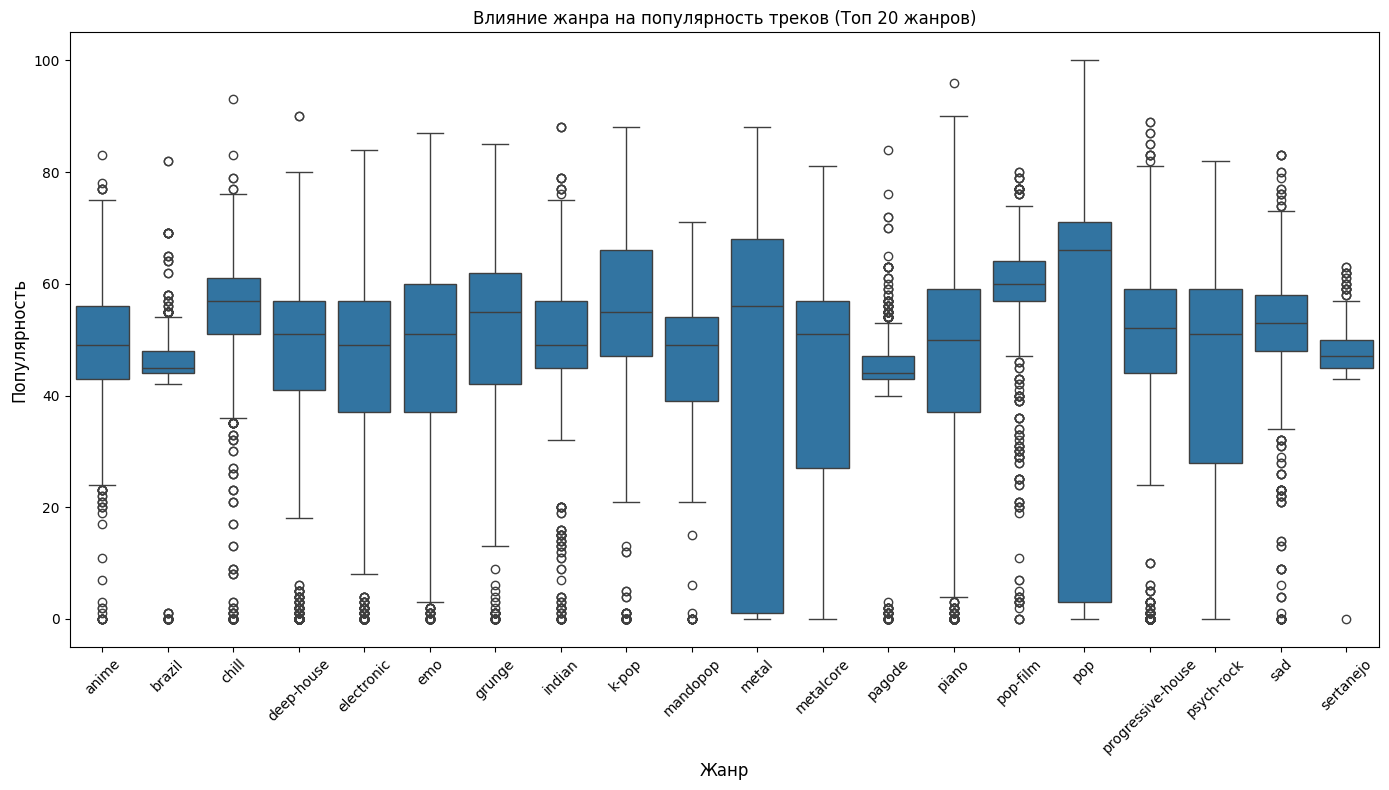

In [314]:
# Сокращение количества жанров (топ-20 по популярности)
top_genres = df.groupby('track_genre')['popularity'].mean().nlargest(20).index
filtered_df = df[df['track_genre'].isin(top_genres)]

# Вычисление средней популярности для топ-20 жанров
average_popularity = filtered_df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
print("Средняя популярность треков по жанрам (Топ 20):")
print(average_popularity)

# Построение boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', data=filtered_df)
plt.title('Влияние жанра на популярность треков (Топ 20 жанров)')
plt.xticks(rotation=45, fontsize=10)  # Уменьшение размера шрифта для подписей
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Популярность', fontsize=12)
plt.tight_layout()  # Автоматическая подгонка элементов графика
plt.show()

Рассмотрим топ-20 по популярности (низкая популярность)

Средняя популярность треков по жанрам (Топ 20 непопулярных):
track_genre
iranian            2.240126
romance            3.074074
latin              7.979212
classical         10.167137
detroit-techno    11.576297
chicago-house     12.554517
kids              14.545982
grindcore         14.626243
jazz              15.919075
idm               15.998262
country           16.529863
honky-tonk        16.679245
reggae            19.124373
breakbeat         19.485987
rock              19.541407
tango             19.916112
party             21.040000
soul              21.415110
dance             22.050360
happy             22.341102
Name: popularity, dtype: float64


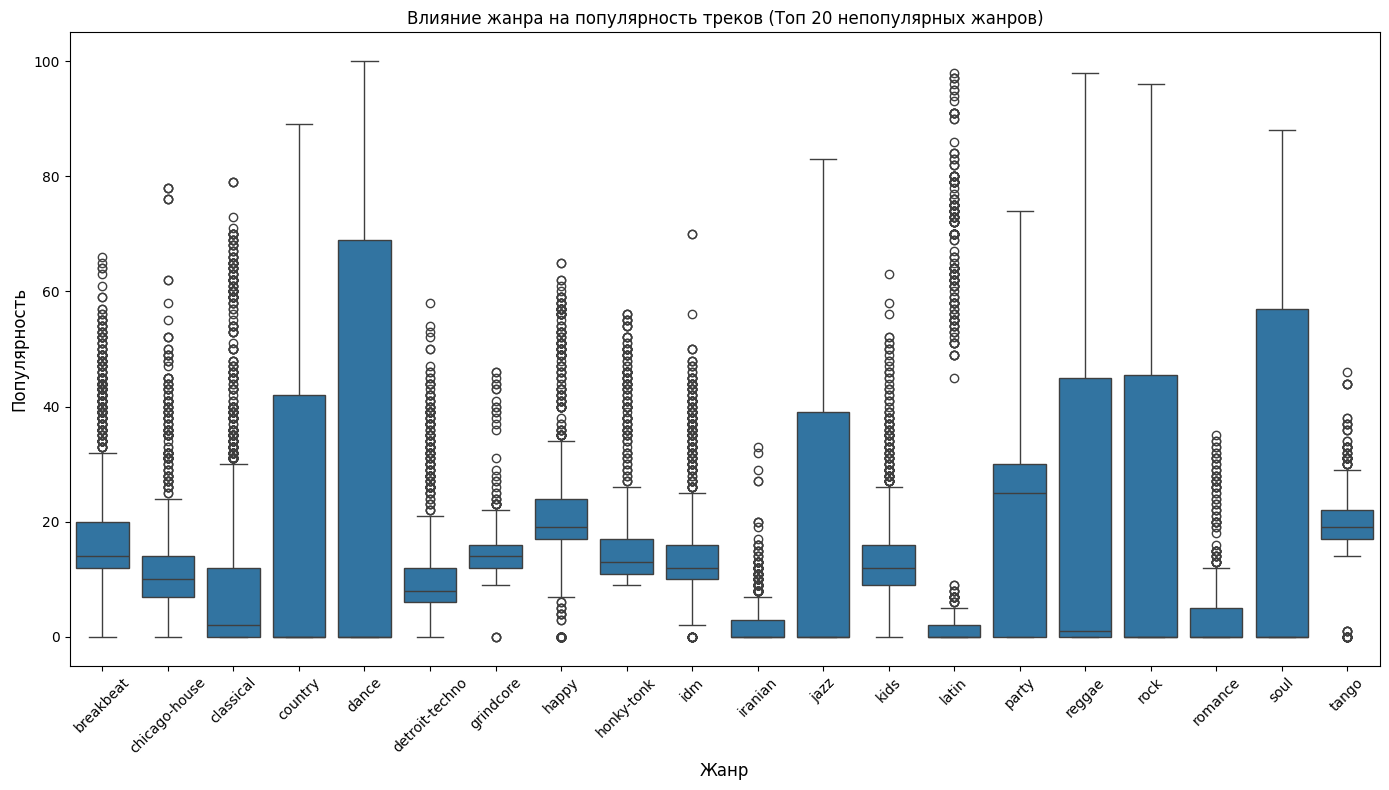

In [315]:
# Сокращение количества жанров (топ-20 по непопулярности)
bottom_genres = df.groupby('track_genre')['popularity'].mean().nsmallest(20).index
filtered_df_bottom = df[df['track_genre'].isin(bottom_genres)]

# Вычисление средней популярности для топ-20 непопулярных жанров
average_popularity_bottom = filtered_df_bottom.groupby('track_genre')['popularity'].mean().sort_values(ascending=True)
print("Средняя популярность треков по жанрам (Топ 20 непопулярных):")
print(average_popularity_bottom)

# Построение boxplot для непопулярных жанров
plt.figure(figsize=(14, 8))
sns.boxplot(x='track_genre', y='popularity', data=filtered_df_bottom)
plt.title('Влияние жанра на популярность треков (Топ 20 непопулярных жанров)')
plt.xticks(rotation=45, fontsize=10)  # Уменьшение размера шрифта для подписей
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Популярность', fontsize=12)
plt.tight_layout()  # Автоматическая подгонка элементов графика
plt.show()

### Вывод

График показывает значительные различия в популярности между различными жанрами. Некоторые жанры демонстрируют более высокие уровни популярности по сравнению с другими.


1. **Контраст между популярными и непопулярными жанрами**:
   - Наиболее популярные жанры, такие как *Pop-Film* и *K-Pop*, имеют значительно высокие показатели популярности (59 и 56 соответственно), что указывает на их широкую привлекательность среди слушателей.
   - В то же время, жанры с низкой популярностью, такие как *Iranian* и *Romance*, имеют значения ниже *22*, что свидетельствует о минимальном интересе к ним.

2. **Эмоциональная и культурная направленность популярных жанров**:
   - Жанры, такие как *Chill* и *Sad*, показывают высокую популярность, что может указывать на растущий интерес к более эмоциональным и атмосферным трекам, которые находят отклик у слушателей.
   - Популярность *K-Pop* подтверждает глобальный тренд, где этот жанр продолжает набирать популярность по всему миру, особенно среди молодой аудитории.

3. **Разнообразие непопулярных жанров**:
   - Непопулярные жанры включают в себя различные стили, от *Jazz* до *Grindcore*, что подчеркивает разнообразие музыкальных предпочтений, но также указывает на то, что эти жанры могут быть менее доступны или менее известны широкой аудитории.
   - Жанры, такие как *Classical* и *Jazz*, хоть и имеют долгую историю, не достигают такой же популярности, как современные музыкальные направления.





## Анализ других атрибутов (loudness и tempo)



Мы также можем проанализировать другие аудио характеристики, такие как loudness и tempo, чтобы увидеть их влияние на популярность.

Коэффициент корреляции между громкостью и популярностью: 0.09

Статистические характеристики громкости:
count    158292.000000
mean         -8.304716
std           5.242181
min         -49.531000
25%          -9.995000
50%          -6.922000
75%          -4.928000
max           4.532000
Name: loudness, dtype: float64

Статистические характеристики популярности:
count    158292.000000
mean         33.333447
std          22.699813
min           0.000000
25%          16.000000
50%          35.000000
75%          51.000000
max         100.000000
Name: popularity, dtype: float64


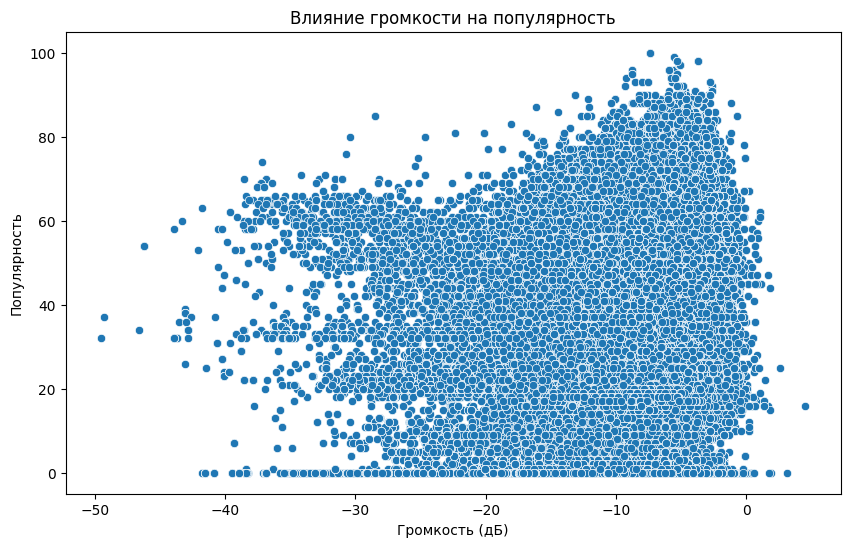

In [316]:
# Вычисление коэффициента корреляции между громкостью и популярностью
correlation = df['loudness'].corr(df['popularity'])
print(f"Коэффициент корреляции между громкостью и популярностью: {correlation:.2f}")

# Вычисление основных статистических характеристик
loudness_stats = df['loudness'].describe()
popularity_stats = df['popularity'].describe()

print("\nСтатистические характеристики громкости:")
print(loudness_stats)

print("\nСтатистические характеристики популярности:")
print(popularity_stats)

# Построение scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=df)
plt.title('Влияние громкости на популярность')
plt.xlabel('Громкость (дБ)')
plt.ylabel('Популярность')
plt.show()

Коэффициент корреляции между громкостью и популярностью: 0.09

Статистические характеристики громкости:
count    158292.000000
mean         -8.304716
std           5.242181
min         -49.531000
25%          -9.995000
50%          -6.922000
75%          -4.928000
max           4.532000
Name: loudness, dtype: float64

Статистические характеристики популярности:
count    158292.000000
mean         33.333447
std          22.699813
min           0.000000
25%          16.000000
50%          35.000000
75%          51.000000
max         100.000000
Name: popularity, dtype: float64


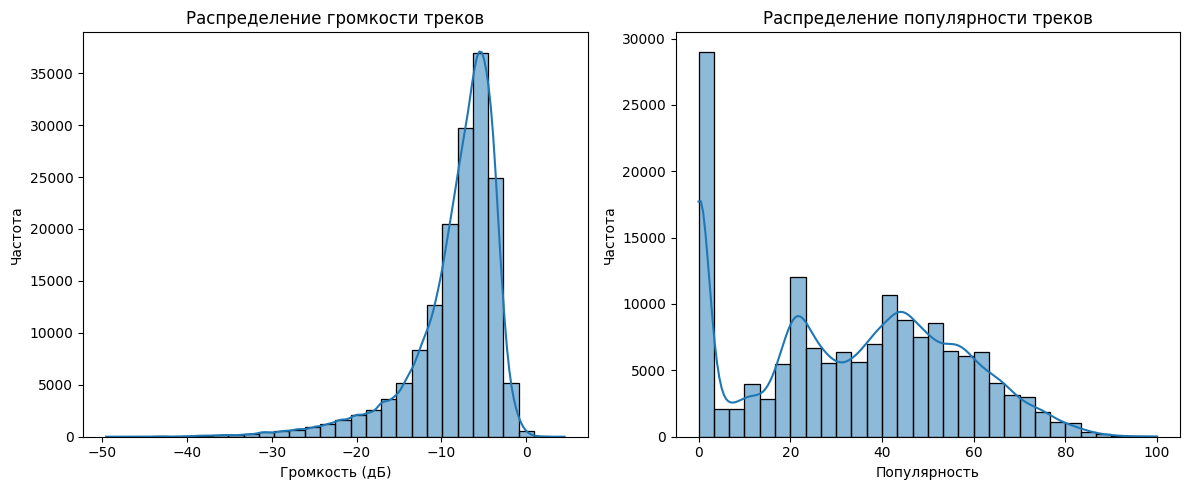

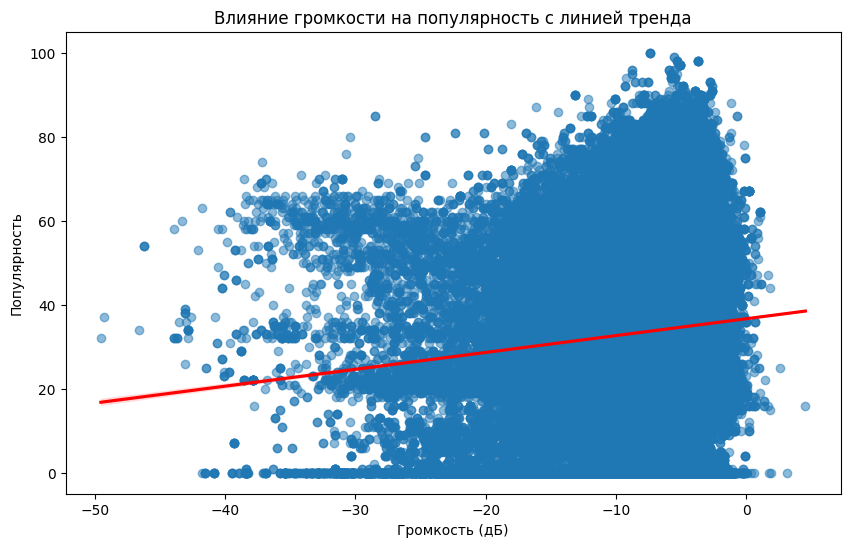

In [317]:
# Вычисление коэффициента корреляции между громкостью и популярностью
correlation = df['loudness'].corr(df['popularity'])
print(f"Коэффициент корреляции между громкостью и популярностью: {correlation:.2f}")

# Вычисление основных статистических характеристик
loudness_stats = df['loudness'].describe()
popularity_stats = df['popularity'].describe()

print("\nСтатистические характеристики громкости:")
print(loudness_stats)

print("\nСтатистические характеристики популярности:")
print(popularity_stats)

# Построение гистограммы для громкости
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Гистограмма громкости
sns.histplot(df['loudness'], bins=30, kde=True)
plt.title('Распределение громкости треков')
plt.xlabel('Громкость (дБ)')
plt.ylabel('Частота')

# Гистограмма популярности
plt.subplot(1, 2, 2)
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Распределение популярности треков')
plt.xlabel('Популярность')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Построение scatter plot с линией тренда
plt.figure(figsize=(10, 6))
sns.regplot(x='loudness', y='popularity', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Влияние громкости на популярность с линией тренда')
plt.xlabel('Громкость (дБ)')
plt.ylabel('Популярность')
plt.show()

### Вывод

### Вывод по анализу громкости и популярности треков

1. **Коэффициент корреляции**:
   - Коэффициент корреляции между громкостью и популярностью составляет **0.05**, что указывает на очень слабую связь - изменения в громкости трека практически не влияют на его популярность

2. **Статистические характеристики громкости**:
   - Среднее значение громкости составляет **-8.26 дБ**
   - Стандартное отклонение — **5.03 дБ**, минимальное значение — **-49.53 дБ**, максимальное — **4.53 дБ**
   - 25% треков имеют громкость ниже **-10.01 дБ**, медиана — ниже **-7.00 дБ**

3. **Статистические характеристики популярности**:
   - Средняя популярность треков составляет **33.24**, с разбросом значений (стандартное отклонение — **22.31**)
   - Минимальная популярность — **0**, максимальная — **100**; 25% треков имеют популярность ниже **17**, медиана — **35**



# 👨‍💻Feature Engineering

In [318]:
# Удаление выбросов и нормализация для указанных признаков
categories = ['duration_ms', 'loudness', 'tempo']
for col in categories:
    # Удаление выбросов с использованием межквартильного диапазона
    # https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B6%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D1%80%D0%B0%D0%B7%D0%BC%D0%B0%D1%85
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [319]:
# 1. Категории для темпа
df['tempo_bin'] = pd.cut(df['tempo'], bins=[0, 60, 120, 180], labels=['slow', 'medium', 'fast'])
# slow: до 60 BPM - медленные треки.
# medium: от 60 до 120 BPM - средний темп.
# fast: свыше 120 BPM - быстрые треки.

# 2. Нормализация громкости
df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())
# Приводит громкость к диапазону от 0 до 1.

# 3. Интерактивные признаки настроения и вокальности
df['energy_valence_product'] = df['energy'] * df['valence']
df['speech_music_ratio'] = df['speechiness'] / (df['instrumentalness'] + 1e-9)
# energy_valence_product - произведение показателей энергии и валентности.
# speech_music_ratio - отношение вокального компонента к инструментальному.

# 4. Метрики танцевальности
df['dance_energy_ratio'] = df['danceability'] / (df['energy'] + 1e-9) # Отношение танцевальности к энергии
df['danceability_binned'] = pd.cut(df['danceability'], bins=[0, 0.33, 0.67, 1], labels=['low', 'medium', 'high'])
# dance_energy_ratio - помогает понять, насколько трек танцевальный по сравнению с его энергией.
# danceability_binned - категории для танцевальности.

# 5. Признак "is_popular"
df['is_popular'] = (df['popularity'] > df['popularity'].median()).astype(int)
# Бинарный признак, указывающий на то, является ли трек популярным (выше медианы).

# 6. Признак "has_vocals"
df['has_vocals'] = (df['speechiness'] > 0.05).astype(int)
# Бинарный признак, указывающий на наличие вокала в треке.

# 7. Признак "acousticness_binary"
df['acousticness_binary'] = (df['acousticness'] > 0).astype(int)
# Бинарный признак для акустичности.

# 8. Признак "instrumentalness_binary"
df['instrumentalness_binary'] = (df['instrumentalness'] > 0).astype(int)
# Бинарный признак для инструментальности.

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,tempo_bin,loudness_normalized,energy_valence_product,speech_music_ratio,dance_energy_ratio,danceability_binned,is_popular,has_vocals,acousticness_binary,instrumentalness_binary
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,...,medium,0.530573,0.329615,1.414441e+05,1.466377,high,1,1,1,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,...,medium,0.002267,0.044322,1.372055e+04,2.530120,medium,1,1,1,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,...,medium,0.380075,0.043080,5.570000e+07,1.220056,medium,1,1,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,...,medium,0.380075,0.043080,5.570000e+07,1.220056,medium,1,1,1,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,...,medium,0.382744,0.073981,5.260000e+07,1.395034,medium,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.171,1,...,fast,0.081193,0.055917,1.528384e+00,1.935673,medium,0,0,1,1
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,...,fast,0.044676,0.007966,4.547414e-02,0.731915,low,0,0,1,1
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,...,fast,0.321598,0.244447,4.200000e+07,1.911854,medium,0,0,1,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,...,fast,0.321900,0.208978,2.970000e+07,1.160079,medium,1,0,1,0


Добавим новый признак, который указывает на то, является ли трек частью альбома или синглом

In [320]:
# Группировка данных для подсчета количества треков в каждом альбоме
grouped = df.groupby(['artists', 'album_name']).agg({'track_id': 'count'}).reset_index().rename(columns={'track_id': 'tracks_in_album'})

# Объединение с оригинальным DataFrame
df = df.merge(grouped, on=['artists', 'album_name'], how='left')

# Создание нового признака "is_single"
df['is_single'] = df['tracks_in_album'].isna().astype(int)

После фича инжиниринга удалим столбцы, которые стали не нужны

In [321]:
# Удаление ненужных столбцов
columns_to_drop = [
    'speechiness',  # Удаляем, так как есть признак has_vocals
    'instrumentalness',  # Удаляем, так как есть признак instrumentalness_binary
    'acousticness',  # Удаляем, так как есть признак acousticness_binary
    'energy',  # energy_valence_product используется вместо energy
    'valence',  # energy_valence_product используется вместо valence
    'danceability',  # Если dance_energy_ratio и danceability_binned используются вместо danceability
    'track_id',
    'artists',
    'album_name', # Заменили на Является ли синглом
    'track_name'
]

df.drop(columns=columns_to_drop, inplace=True)

In [322]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'key', 'loudness', 'mode',
       'liveness', 'tempo', 'time_signature', 'track_genre', 'duration_min',
       'tempo_bin', 'loudness_normalized', 'energy_valence_product',
       'speech_music_ratio', 'dance_energy_ratio', 'danceability_binned',
       'is_popular', 'has_vocals', 'acousticness_binary',
       'instrumentalness_binary', 'tracks_in_album', 'is_single'],
      dtype='object')

## Вывод

Для фича-инжиниринга были добавлены новые признаки, которые могут улучшить качество модели:

<br>

1. **Категории для темпа**:
   - Признак `tempo_bin` был создан для классификации треков по темпу (медленный, средний, быстрый)

2. **Нормализация громкости**:
   - Признак `loudness_normalized` нормализует громкость треков в диапазоне от 0 до 1. Нормализация важна для устранения эффекта масштаба и делает признак лучше для моделей

3. **Интерактивные признаки настроения и вокальности**:
   - Признаки `energy_valence_product` и `speech_music_ratio` позволяют оценить взаимодействие между энергией и настроением трека, и соотношение вокальных и инструментальных компонентов.

4. **Метрики танцевальности**:
   - Признаки `dance_energy_ratio` и `danceability_binned` - насколько трек танцевален по сравнению с его энергией

5. **Признаки популярности и вокала**:
   - Бинарные признаки `is_popular` и `has_vocals`

6. **Бинаризация акустических признаков**:
   - Признаки `acousticness_binary` и `instrumentalness_binary` позволяют быстро определить наличие акустических или инструментальных элементов в треке

7. **Группировка данных**:
   - Создание признака `is_single`, основанного на количестве треков в альбоме, позволяет различать синглы и альбомные треки. Замена для колонки Название альбома


# 👩‍🎓Эксперименты с моделями машинного обучения/глубокого обучения